<img src="" width="600" align="middle"/>

<img src="https://raw.githubusercontent.com/CristianR8/Parte1-Sesion4---Imagenes-Espectrales/main/images/banner-spectral.png" width="1000" align="middle"/>

# <center> **03. Imágenes espectrales** </center>

## **Contenido**

[**1. Breve introduccion a las imagenes espectrales**](#tema1)

[**2. Desmezclado hiperespectral (Unmixing)**](#tema2)

[**3. Detección hiperespectral de objetivos**](#tema3)

[**4. Clasificación hiperespectral**](#tema4)

[**5. Deteccion de comida usando perfiles espectrales (Usando DL)**](#tema4)




In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [1]:
import os
os.chdir("/content/drive/MyDrive/Imagenes-espectrales-session")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Imagenes-espectrales-session'

<h2 id="tema1">1. Breve introduccion a las imagenes espectrales</h2>
<a name="tema1">


Una imagen espectral se refiere a una imagen que contiene información de la luz capturada en múltiples bandas del espectro electromagnético. A diferencia de las imágenes tradicionales, que se capturan en tres bandas de color básicas (rojo, verde y azul), las imágenes espectrales pueden capturar información en decenas, cientos o incluso miles de bandas espectrales, cubriendo rangos desde el ultravioleta, pasando por el visible, y extendiéndose hasta el infrarrojo y más allá.

<div style="text-align: center;">
  <img src="https://raw.githubusercontent.com/CristianR8/Parte1-Sesion4---Imagenes-Espectrales/main/images/Picture00.png" alt="Imagenes espectrales" style="width: 600px;"/>
</div>

- Los datos hiperespectrales miden cientos de longitudes de onda del espectro electromagnético (generalmente de 350 nm a 2500 nm, pero depende del sensor).

<img src="https://raw.githubusercontent.com/CristianR8/Parte1-Sesion4---Imagenes-Espectrales/main/images/Picture01.png" width="600" align="middle"/>


- Una imagen de un sensor hiperespectral da como resultado un cubo de datos hiperespectrales con dos dimensiones espaciales y una espectral (latitud x longitud x número de bandas espectrales). Una banda espectral mide una longitud de onda específica del espectro electromagnético.

<img src="https://raw.githubusercontent.com/CristianR8/Parte1-Sesion4---Imagenes-Espectrales/main/images/Picture02.png" width="600" align="middle"/>

- Cada píxel (latitud x longitud) del cubo de datos hiperespectral tiene un espectro. Este espectro es el resultado de la energía que viaja desde el sol, a través de la atmósfera, interactuando con la superficie de la tierra, y se refleja de nuevo a través de la atmósfera para ser medido por el sensor.

<img src="https://raw.githubusercontent.com/CristianR8/spectral-images-session3/main/images/Picture03.png" width="600" align="middle"/>

- Como se ha mencionado anteriormente, el espectro de un píxel es el resultado de la interacción de energías con la superficie terrestre. Dependiendo del material, la cantidad de energía reflejada diferirá a lo largo del espectro electromagnético. Estas diferencias nos permiten discriminar entre materiales en una imagen.

<img src="https://raw.githubusercontent.com/CristianR8/spectral-images-session3/main/images/Picture04.png" width="500" align="middle"/>


In [ ]:
# # importaciones y configuración
import numpy as np
import os.path
import scipy.io
from loadmat import loadmat

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi*2 # ejecutar esto para hacer las cifras más grandes, a menudo tienen que ejecutar el bloque varias veces para que tome

Los datos con los que trabajaremos son el "MUUFL Gulfport Dataset".  Este conjunto de datos es un cubo de imágenes hiperespectrales y una nube de puntos LiDAR co-registrada recogida sobre el campus de la Universidad de Mississippi - Gulfpark.  Los datos tienen etiquetas de clase/cobertura del suelo, así como varios objetivos de superpíxel y subpíxel colocados por toda la escena.

<table style="width:100%; table-layout:fixed;">
  <tr>
    <td style="text-align:center;">
      <img src="https://raw.githubusercontent.com/CristianR8/spectral-images-session3/main/images/gulfpark01.jpg" alt="MUUFL Gulfport 01" width="600px"/>
    </td>
    <td style="text-align:center;">
      <img src="https://raw.githubusercontent.com/CristianR8/spectral-images-session3/main/images/gulfpark02.jpeg" alt="MUUFL Gulfport 02" width="600px"/>
    </td>
  </tr>
</table>



Estos datos pueden obtenerse aquí: <url>https://github.com/GatorSense/MUUFLGulfport</url>

In [ ]:
# cargar imagen del campus de gulfport
img_fname = 'muufl_gulfport_campus_w_lidar_1.mat'
spectra_fname = 'tgt_img_spectra.mat'

dataset = loadmat(img_fname)['hsi']

hsi = dataset['Data']

In [ ]:
# comprueba la forma de los datos
n_r,n_c,n_b = hsi.shape
hsi.shape

(325, 337, 72)

In [ ]:
# extraer un píxel/espectro aleatorio
# Ejercicio:  Cambia los valores rr y cc para imprimir diferentes píxeles/espectro alrededor de la imagen y traza los espectros (dos celdas siguientes)
rr,cc = 200,200
spectrum = hsi[rr,cc,:]
spectrum

array([-0.14256676,  0.00160593, -0.07216142, -0.03522298, -0.0088321 ,
       -0.00041614, -0.00839062,  0.00647877,  0.00408422,  0.00377911,
        0.00145528,  0.00831163,  0.0023367 , -0.0021756 ,  0.00735094,
       -0.00070745,  0.00629148,  0.00693838,  0.01027937,  0.0132687 ,
        0.01210822,  0.01457972,  0.01145938,  0.01140976,  0.01596007,
        0.01659633,  0.016793  ,  0.01734954,  0.02173703,  0.01864087,
        0.01551593,  0.01589793,  0.0210894 ,  0.01882678,  0.01963093,
        0.01127812,  0.026925  ,  0.03135767,  0.05040607,  0.06127474,
        0.06619719,  0.06493738,  0.07225795,  0.08724425,  0.07693858,
        0.07323557,  0.08855281,  0.07314146,  0.0940942 ,  0.09513798,
        0.09216034,  0.08167624,  0.08812357,  0.0891799 ,  0.08899884,
        0.07964814,  0.08163106,  0.09557428,  0.09178805,  0.07838913,
        0.09807003,  0.01060338,  0.10115297,  0.06507722,  0.08905484,
        0.06541339,  0.09294543,  0.11157751,  0.05029195,  0.01

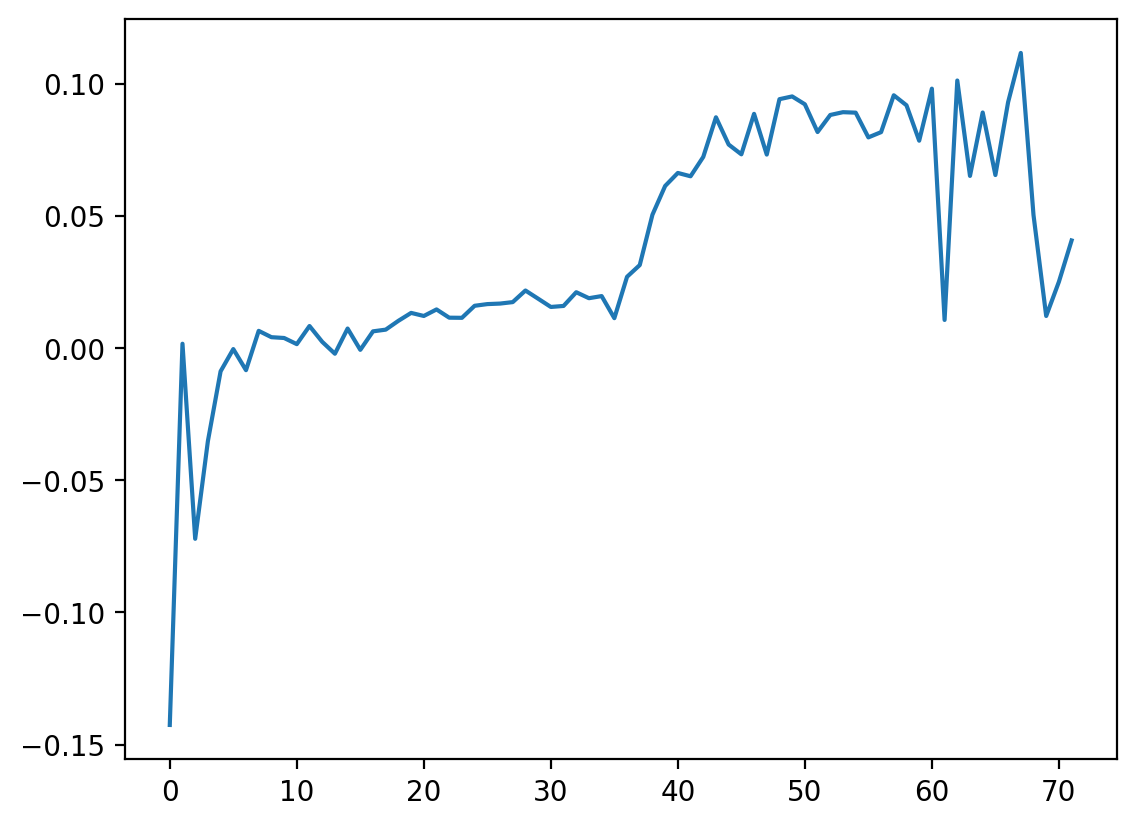

In [ ]:
# trazar un espectro
plt.plot(spectrum)

Text(0.5, 1.0, 'Spectrum from Pixel 200,200')

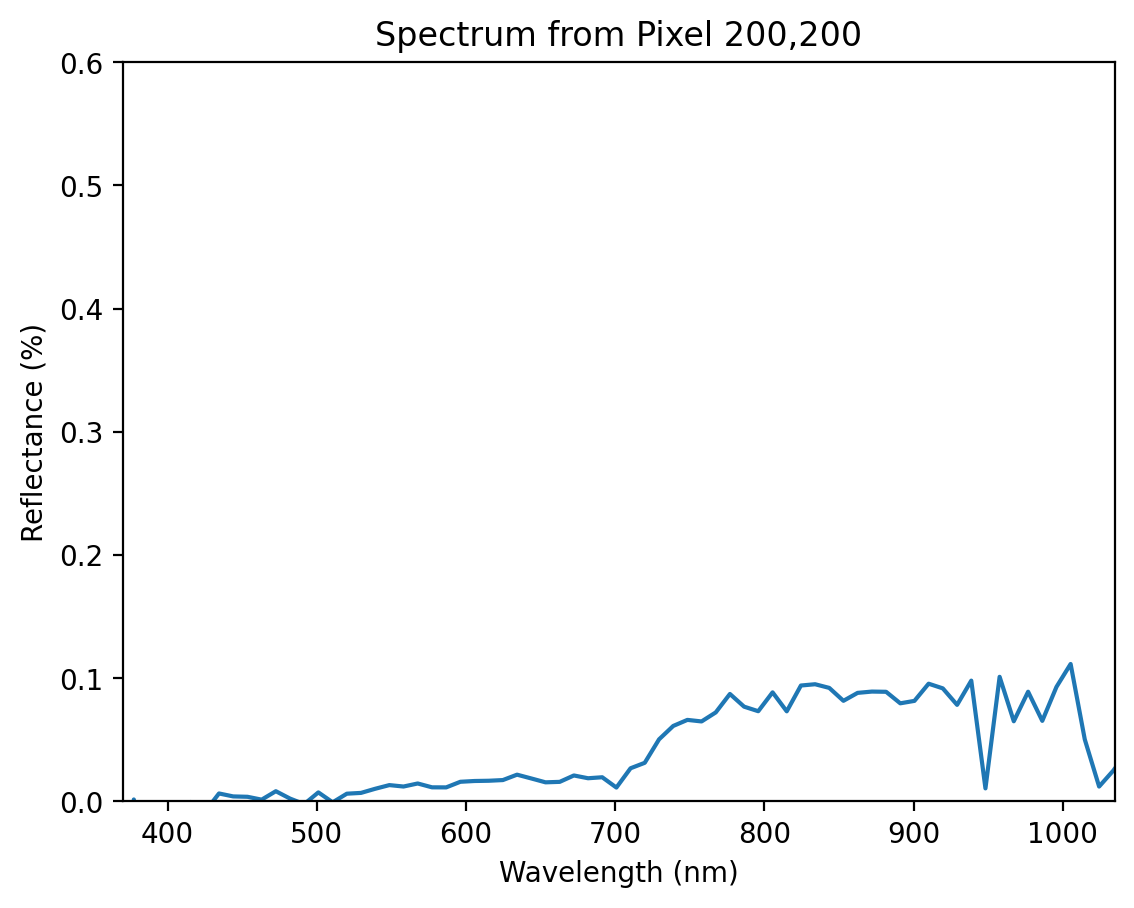

In [ ]:
# Necesitamos etiquetar los ejes
wavelengths = dataset['info']['wavelength']

plt.plot(wavelengths,spectrum)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.ylim([0, 0.6])
plt.xlim([370, 1035])
plt.title(('Spectrum from Pixel ' + str(rr)+ ','+str(cc)))

In [ ]:
# trazar una imagen de una banda individual
# Ejercicio: Cambia el número de banda en la línea de abajo para ver diferentes bandas de la imagen HSI
plt.imshow(hsi[:,:,30],vmin=0,vmax=.75,cmap='Reds')
plt.colorbar()
plt.title('A single band of Hyperspectral Image in False Color')

Text(0.5, 1.0, 'A single band of Hyperspectral Image in False Color')

In [ ]:
# encontrar los números de banda para las longitudes de onda aproximadas del rojo, verde y azul (RGB)
wavelengths[9],wavelengths[20],wavelengths[30]

In [ ]:
# hacer una imagen psuedo-RGB a partir de las bandas adecuadas
psuedo_rgb = hsi[:,:,(30,20,9)]
psuedo_rgb = np.clip(psuedo_rgb,0,1.0)
plt.imshow(psuedo_rgb)

In [ ]:
# Es demasiado oscuro. Añadimos un poco de corrección gamma
plt.imshow(psuedo_rgb**(1/2.2))

In [ ]:
# comparar con la imagen RGB proporcionada (hecha con una mejor selección/ponderación de bandas)
plt.figure(figsize=(10,10))
plt.imshow(dataset['RGB'])
plt.plot(rr,cc,'c*',markersize=10) #etiquetar la ubicación del píxel seleccionado en el gráfico anterior

**¿Qué tipo de análisis puede realizarse con una imagen hiperespectral?**

Entre las técnicas habituales de análisis de imágenes hiperespectrales se incluyen:

 * **Desmezcla hiperespectral**:  El objetivo del desmezclado hiperespectral es descomponer un cubo de imagen en las firmas espectrales *puras* que se encuentran en una escena (llamadas **miembros finales**) y la cantidad (o **proporción**) de cada miembro final que se encuentra en cada píxel. Se trata de un análisis *subpíxel*, ya que estamos determinando cantidades subpíxel de cada material en cada píxel.

  * **Detección de objetivos subpíxel**: Detección de un objetivo (de tamaño subpíxel) en una escena hiperespectral.  

  * **Clasificación**: Clasificación de cada píxel (o parte de un píxel) en una de varias categorías o clases de interés.


<h2 id="tema2">2. Breve introducción al desmezclado hiperespectral</h2>
<a name="tema2">

En teledetección, el espectro de un píxel se compone de más de un material, lo que se conoce como píxel "mixto". Por ejemplo, en la imagen siguiente (las líneas amarillas designan los píxeles), si midiéramos el espectro del píxel central, tendría firmas de árbol, hierba y arena. A menudo es útil conocer el porcentaje de cada material en cada píxel, lo que se denomina desmezcla hiperespectral.

<img src="https://raw.githubusercontent.com/CristianR8/spectral-images-session3/main/images/Picture05.png" width="600" align="middle"/>

El objetivo del desmezclado hiperespectral es descomponer un cubo de imagen en las firmas espectrales puras que se encuentran en una escena (llamadas endmembers) y la cantidad (o proporción) de cada endmember que se encuentra en cada píxel. Las firmas espectrales puras son aquellas que sólo tienen UN material. Se trata de un análisis subpixel ya que estamos determinando cantidades subpixel de cada material en cada pixel.

Cuando se realiza unmixing hiperespectral, primero debemos asumir un modelo de mezcla particular.  

El modelo de mezcla más utilizado en la práctica es el *Modelo de Mezcla Lineal* (también conocido como *Modelo de Geometría Convexa*).  Aunque es el más utilizado, a menudo no se cumple en la práctica.

<img src="https://raw.githubusercontent.com/CristianR8/spectral-images-session3/main/images/Picture06.png" width="600" align="middle"/>

Existen varios modelos de mezcla no lineal para tener en cuenta las copas de los árboles y la mezcla multinivel y la mezcla íntima en las imágenes. Estos modelos incluyen:

* Modelos Hapke, Kulbelka-Munk y Shkuratov*: Modelos de mezcla basados en la física que se apoyan en la teoría de la transferencia radiativa.  Son complejos desde el punto de vista computacional y requieren un conocimiento significativo de los parámetros de la escena para ejecutarlos con precisión.
  
* Mezcla convexa por piezas: Representa la escena con conjuntos discretos de mezclas lineales.  Tiene en cuenta regiones dispares de la escena (por ejemplo, una imagen que cubra regiones urbanas y rurales tendrá probablemente dos conjuntos distintos de endmembers asociados a cada región).
  
* *No basado en la física/Manifold*: Representa las no linealidades de los datos con modelos no lineales utilizados habitualmente en la literatura sobre aprendizaje automático estadístico, como los enfoques de kernel, el aprendizaje de múltiples no lineales y otros.

Además de la mezcla no lineal, el modelo de mezcla lineal puede no ser válido cuando se considera la variabilidad espectral.   La variabilidad espectral puede estar causada por las condiciones ambientales (por ejemplo, variaciones en la iluminación), las condiciones atmosféricas (por ejemplo, agua en la atmósfera) y la variabilidad inherente dentro de un material.  La variabilidad inherente depende de la escala del miembro final considerado. Por ejemplo, si una especie vegetal concreta está asociada a un miembro final, la variación en este miembro final puede deberse a que el haz y el envés de las hojas de esa especie tienen firmas espectrales diferentes).  Los métodos de desmezcla espectral que tienen en cuenta la variabilidad espectral pueden clasificarse en dos categorías: enfoques basados en conjuntos y enfoques basados en la distribución.  Los enfoques basados en conjuntos representan un miembro final utilizando un conjunto discreto de espectros de miembros finales. Los enfoques basados en la distribución utilizan una distribución de probabilidad completa para representar un miembro final y su variabilidad asociada.  A menudo, los enfoques basados en conjuntos infrarrepresentan la variabilidad, mientras que los basados en la distribución pueden sobrerrepresentarla.   Algunos ejemplos de métodos de desmezcla que tienen en cuenta la variabilidad espectral son:

* *MESMA*: Un enfoque basado en conjuntos, Multiple Endmember Spectral Mixture Analysis

* *AAM*: Un enfoque basado en conjuntos, Minimización de ángulos alternos
  
* *Modelo de composición normal*: Un enfoque basado en la distribución en el que cada miembro final se representa mediante una distribución gaussiana.


* *Modelo de composición Beta*: Un enfoque basado en la distribución en el que cada miembro final (y cada banda/longitud de onda) se representa mediante una distribución Beta para hacer que los valores de reflectancia de los miembros finales se mantengan entre 0 y 1.




El modelo de mezcla lineal asume que cada píxel es una combinación convexa de espectros puros de *miembros finales*.   Los miembros finales son las firmas espectrales de los materiales puros constituyentes de una escena.  El modelo de mezcla lineal puede escribirse como

$\mathbf{x}_i = \sum_{k=1}^M p_{ik}\mathbf{e}_{k} + \epsilon_i \quad i= 1, \ldots, N$

donde $N$ es el número de píxeles de la imagen, $M$ es el número de miembros finales, $\epsilon_i$ es el término de error residual, $p_{ik}$ es la *proporción* (también llamada *abundancia*) del miembro final $k$ésimo en el píxel $i$ésimo, $\mathbf{e}_k$ es la firma espectral del miembro final $k$ésimo, y $\mathbf{x}_i$ es la firma espectral del píxel $i$ésimo.

En este modelo, se supone que las proporciones suman uno y son no negativas (ya que se refieren a porcentajes de material que se encuentra dentro de un píxel):

$p_{ik} \ge 0 \quad \forall i,k$

$\sum_{k=1}^M p_{ik} = 1$

El modelo de mezcla lineal (también llamado a veces "modelo de geometría convexa") puede visualizarse como se muestra en la imagen siguiente.  En este modelo, cada píxel se encuentra dentro del casco convexo definido por los endmembers.  Además, los endmembers se llaman *endmembers* porque se encuentran en los extremos de los datos.  Se ha demostrado que este modelo es eficaz para modelar mezclas debidas a una resolución espacial inadecuada por parte del generador de imágenes hiperespectrales (pero no debido a mezclas en el suelo o reflexiones múltiples).

<img src="https://raw.githubusercontent.com/CristianR8/spectral-images-session3/main/images/Picture07.png" width="600" align="middle"/>

Debido al modelo de mezcla lineal, a menudo tenemos el objetivo de "desmezclar" un cubo de datos hiperespectrales.  El objetivo de la desmezcla es, dados los datos $\mathbf{X} = \left\{ \mathbf{x}_i \right\}_{i=1}^N$, estimar las firmas espectrales de los miembros finales y sus proporciones encontradas dentro de cada píxel en un cubo de datos hiperespectrales.  Obsérvese que este problema equivale a un problema de factorización de matrices mal planteado.  Por lo tanto, para resolverlo, generalmente tenemos que imponer restricciones a los miembros finales y sus proporciones.

In [ ]:
hsi = dataset['Data'][:,:,4:-4] # recortar bandas ruidosas
valid_mask = dataset['valid_mask'].astype(bool)
n_r,n_c,n_b = hsi.shape
wvl = dataset['info']['wavelength'][4:-4]
rgb = dataset['RGB']

Después de cargar los datos, vamos a extraer algunos endmembers utilizando el algoritmo Pixel Purity Index.  Este algoritmo supone que en la escena se pueden encontrar espectros puros para cada endmember.  Esta suposición no es válida para conjuntos de datos muy mezclados.

Por supuesto, hay MUCHOS algoritmos en la literatura además de PPI que estiman los espectros de los miembros finales.

In [ ]:
# extraer algunos endmembers mediante el algoritmo Pixel Purity Index
# usando PySptools de https://pysptools.sourceforge.io
# Ejercicio: Variar el número de endmembers y el número de pinchos para ver los cambios en la estimación de endmember.
!pip install pysptools
import pysptools
import pysptools.eea

hsi_array = np.reshape(hsi,(n_r*n_c,n_b))
valid_array = np.reshape(valid_mask,(n_r*n_c,))
M = hsi_array[valid_array,:]
q = 5 #Número de Endmembers
numSkewers = 500 #Parámetro PPI del número de proyecciones utilizadas para encontrar puntos de datos extremos que pueden ser endmembers
E,inds = pysptools.eea.eea.PPI(M, q, numSkewers)

ERROR: Could not install packages due to an OSError: [Errno 107] Transport endpoint is not connected



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-d61dee792a4c>", line 5, in <cell line: 5>
    import pysptools
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
  

In [ ]:
# trazar los endmembers que encontramos
plt.plot(wvl,E.T)
plt.xlabel('wavelength (nm)')
plt.ylabel('reflectance')
plt.legend([str(i+1) for i in range(q)], loc = 'upper left')
plt.ylim((-0.1,1))
plt.title("PPI Endmembers")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-154e0ee84e2d>", line 2, in <cell line: 2>
    plt.plot(wvl,E.T)
NameError: name 'E' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py"

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-154e0ee84e2d>", line 2, in <cell line: 2>
    plt.plot(wvl,E.T)
NameError: name 'E' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py"

Tras estimar los espectros de los miembros finales, podemos estimar las abundancias/proporciones de cada píxel de la imagen.  Para ello utilizaremos el algoritmo FCLS.  (De nuevo, hay muchos algoritmos en la literatura que estiman proporciones dados los endmembers.  FCLS es sólo un ejemplo).

In [ ]:
# encontrar abundancias dados los endmembers
import pysptools.abundance_maps

maps = pysptools.abundance_maps.amaps.FCLS(M, E) #Esto funciona lentamente con grandes conjuntos de datos/más endmembers.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-a55945e683a8>", line 2, in <cell line: 2>
    import pysptools.abundance_maps
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in s

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-a55945e683a8>", line 2, in <cell line: 2>
    import pysptools.abundance_maps
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in s

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-a55945e683a8>", line 2, in <cell line: 2>
    import pysptools.abundance_maps
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in s

In [ ]:
# Volver a trazar mapas de abundancia
map_imgs = []
for i in range(q):
    map_lin = np.zeros((n_r*n_c,))
    map_lin[valid_array] = maps[:,i]
    map_imgs.append(np.reshape(map_lin,(n_r,n_c)))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-39da5f5cc748>", line 3, in <cell line: 3>
    for i in range(q):
NameError: name 'q' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-39da5f5cc748>", line 3, in <cell line: 3>
    for i in range(q):
NameError: name 'q' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py

In [ ]:
# mostrar mapas de abundancia
for i in range(q):
    plt.figure()
    plt.imshow(map_imgs[i],vmin=0,vmax=1)
    plt.colorbar()
    plt.title('FCLS Abundance Map %d'%(i+1,))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-95b0bddca04f>", line 2, in <cell line: 2>
    for i in range(q):
NameError: name 'q' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-95b0bddca04f>", line 2, in <cell line: 2>
    for i in range(q):
NameError: name 'q' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py

Alternativamente, podemos estimar los endmembers, el número de endmembers y las abundancias simultáneamente utilizando el algoritmo SPICE.  SPICE también es aplicable a conjuntos de datos muy mezclados, ya que no supone que los espectros de los miembros finales puedan encontrarse en el conjunto de datos.  Por supuesto, éste es sólo un ejemplo de este tipo de algoritmo en la literatura.

El código Matlab para SPICE se puede encontrar aquí: <url>https://github.com/GatorSense/SPICE</url>

In [ ]:
# ejecutar SPICE para encontrar el número de endmembers, endmembers y abundancias simultáneamente
# Ejercicio: Variar los parámetros SPICE (en params) para ver el efecto en la estimación de endmember y parámetros.
!pip install quadprog
from SPICE import *

params = SPICEParameters()
inputData = M.T.astype(float)

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spi

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-39113a6a3e9e>", line 4, in <cell line: 4>
    from SPICE import *
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback

In [ ]:
# para ahorrar tiempo de procesamiento, reduzca el tamaño de los datos de entrada para procesar menos píxeles
dsData = inputData[:,::20]
dsData.shape

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-13b7d14ecd7c>", line 2, in <cell line: 2>
    dsData = inputData[:,::20]
NameError: name 'inputData' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-13b7d14ecd7c>", line 2, in <cell line: 2>
    dsData = inputData[:,::20]
NameError: name 'inputData' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/int

In [ ]:
# ejecutar SPICE
[eM,dsP] = SPICE(dsData,params)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-5957a4afb650>", line 2, in <cell line: 2>
    [eM,dsP] = SPICE(dsData,params)
NameError: name 'SPICE' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPytho

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-5957a4afb650>", line 2, in <cell line: 2>
    [eM,dsP] = SPICE(dsData,params)
NameError: name 'SPICE' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/in

In [ ]:
# Ahora que ya tenemos endmembers, descomponemos la matriz de datos completa en lugar de los datos de la muestra reducida.
P = unmix2(inputData,eM)
n_em = eM.shape[1]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-d315916f39eb>", line 2, in <cell line: 2>
    P = unmix2(inputData,eM)
NameError: name 'unmix2' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-d315916f39eb>", line 2, in <cell line: 2>
    P = unmix2(inputData,eM)
NameError: name 'unmix2' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interact

In [ ]:
# Graficamos los endmembers
plt.plot(wvl,eM)
plt.xlabel('wavelength (nm)')
plt.ylabel('reflectance')
plt.legend([str(i+1) for i in range(q)], loc='upper left')
plt.ylim((-0.1,1))
plt.title('SPICE Endmembers')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-31492977bfa2>", line 2, in <cell line: 2>
    plt.plot(wvl,eM)
NameError: name 'eM' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py"

In [ ]:
# volver a trazar mapas de abundancia
P_imgs = []
for i in range(n_em):
    map_lin = np.zeros((n_r*n_c,))
    map_lin[valid_array] = P[:,i]
    P_imgs.append(np.reshape(map_lin,(n_r,n_c)))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-c74b963c7136>", line 3, in <cell line: 3>
    for i in range(n_em):
NameError: name 'n_em' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultr

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-c74b963c7136>", line 3, in <cell line: 3>
    for i in range(n_em):
NameError: name 'n_em' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactivesh

In [ ]:
# mostrar mapas de abundancia
for i in range(n_em):
    plt.figure()
    plt.imshow(P_imgs[i],vmin=0,vmax=1)
    plt.colorbar()
    plt.title('SPICE Abundance Map %d'%(i+1,))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-adacf9f811ef>", line 2, in <cell line: 2>
    for i in range(n_em):
NameError: name 'n_em' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultr

<h2 id="tema3">3. Breve introducción a la detección hiperespectral de objetivos</h2><a name="tema3">


El objetivo de la detección de objetivos hiperespectrales es detectar si un objetivo concreto se encuentra en cada píxel de un cubo de datos hiperespectrales.  En general, los enfoques de detección de objetivos no son eficaces para estimar *cuánto* de un objetivo se encuentra dentro del campo de visión de un píxel (eso sería desmezclar) - sólo si el material está allí o no (con cierta confianza).  

Los algoritmos de detección de objetivos hiperespectrales más utilizados son el *Spectral Matched Filter* (SMF) y el *Adaptive Cosine Estimator* (ACE).  Ambos métodos requieren tener de antemano la firma del blanco que se busca.  Ambos métodos estiman la confianza en el objetivo calculando el coseno del ángulo entre la firma del objetivo y un píxel de prueba en un espacio blanqueado (es decir, tras la normalización del fondo).  La principal diferencia entre ambos métodos es que el SMF tiene en cuenta la magnitud, mientras que el ACE no.  Se calculan del siguiente modo:


$SMF = \frac{\left(\left(\mathbf{s}-\mu\right)^T \Sigma^{-1}\left(\mathbf{x}-\mu\right)\right)^2}{\left(\mathbf{s}-\mu\right)^T \Sigma^{-1}\left(\mathbf{s}-\mu\right)}$

$ACE = \frac{\left(\left(\mathbf{s}-\mu\right)^T \Sigma^{-1}\left(\mathbf{x}-\mu\right)\right)^2}{\left(\mathbf{s}-\mu\right)^T \Sigma^{-1}\left(\mathbf{s}-\mu\right)\left(\mathbf{x}-\mu\right)^T \Sigma^{-1}\left(\mathbf{x}-\mu\right)}$

donde $\mathbf{s}$ es la firma del objetivo, $\mathbf{x}$ es el píxel bajo prueba, $\mu$ es la media del fondo, y $\Sigma$ es la covarianza del fondo.

<img src="https://raw.githubusercontent.com/CristianR8/spectral-images-session3/main/images/ACE.png" width="600" align="middle"/>

**Estimación de la media y la covarianza del fondo**.  
A menudo resulta difícil determinar cómo estimar la media y la covarianza del fondo.  Si hay muy pocos objetivos en una escena, puede bastar con utilizar la media y la covarianza globales de la escena para representar el fondo.  También se ha trabajado para segmentar la escena y, a continuación, calcular las estadísticas del fondo para cada segmento.

También hay enfoques en los que las estadísticas de fondo se calculan en un enfoque de "ventana deslizante" para centrarse sólo en la información local durante la estimación del fondo. El problema de estos métodos es determinar el tamaño de la ventana.  Si la ventana es demasiado pequeña, puede tener problemas para estimar las estadísticas de fondo de forma fiable.  Sin embargo, si la ventana es demasiado grande, ya no se utiliza sólo la información local.


El conjunto de datos MUUFL Gulfport incluye 64 objetivos emplazados que varían entre 0,25m^2$ y 3m^2$ de tamaño.  La resolución espacial del cubo de datos hiperespectrales es de $1m^2$.  Por lo tanto, el tamaño de estos objetivos varía de superpíxel a subpíxel, y los más pequeños cubren como máximo un cuarto del campo de visión de un píxel (si están situados completamente dentro de ese píxel y no a caballo entre varios píxeles).  Además, los objetivos pueden ser subpíxeles debido a la oclusión de los árboles del campus.  

Utilicemos métodos de detección de objetivos para tratar de encontrarlos:

In [ ]:
# imports and setup
import numpy as np
import os.path
import scipy.io
from loadmat import loadmat

import matplotlib as mpl
%matplotlib inline
default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi*2
import matplotlib.pyplot as plt

from hsi_detectors import smf_detector,ace_detector

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-9dae2bf284a8>", line 13, in <cell line: 13>
    from hsi_detectors import smf_detector,ace_detector
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshel

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-9dae2bf284a8>", line 13, in <cell line: 13>
    from hsi_detectors import smf_detector,ace_detector
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshel

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-9dae2bf284a8>", line 13, in <cell line: 13>
    from hsi_detectors import smf_detector,ace_detector
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshel

In [ ]:
# load gulfport campus image
img_fname = 'muufl_gulfport_campus_w_lidar_1.mat'
spectra_fname = 'tgt_img_spectra.mat'

dataset = loadmat(img_fname)['hsi']

hsi = dataset['Data']
n_r,n_c,n_b = hsi.shape
wvl = dataset['info']['wavelength']
rgb = dataset['RGB']

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/scipy/io/matlab/_mio.py", line 39, in _open_file
    return open(file_like, mode), True
OSError: [Errno 107] Transport endpoint is not connected: 'muufl_gulfport_campus_w_lidar_1.mat'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-ae28cb647fcb>", line 5, in <cell line: 5>
    dataset = loadmat(img_fname)['hsi']
  File "/content/drive/MyDrive/Imagenes-espectrales-session/loadmat.py", line 14, in loadmat
  File "/usr/local/lib/python3.10/dist-packages/scipy/io/matlab/_mio.py", line 225, in loadmat
    with _open_file_context(file_name, appendmat) as f:
  File "/usr/lib/python3.10/contextlib.py", line 135, in __enter__
    return next(self.gen)
  File "/usr/local/lib/

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/scipy/io/matlab/_mio.py", line 39, in _open_file
    return open(file_like, mode), True
OSError: [Errno 107] Transport endpoint is not connected: 'muufl_gulfport_campus_w_lidar_1.mat'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-ae28cb647fcb>", line 5, in <cell line: 5>
    dataset = loadmat(img_fname)['hsi']
  File "/content/drive/MyDrive/Imagenes-espectrales-session/loadmat.py", line 14, in loadmat
  File "/usr/local/lib/python3.10/dist-packages/scipy/io/matlab/_mio.py", line 225, in loadmat
    with _open_file_context(file_name, appendmat) as f:
  File "/usr/lib/python3.10/contextlib.py", line 135, in __enter__
    return next(self.gen)
  File "/usr/local/lib/

In [ ]:
# cargar las firmas de destino
spectra_dataset = loadmat(spectra_fname)
tgts = spectra_dataset['tgt_img_spectra']['spectra']
tgt_names = spectra_dataset['tgt_img_spectra']['names']

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/scipy/io/matlab/_mio.py", line 39, in _open_file
    return open(file_like, mode), True
OSError: [Errno 107] Transport endpoint is not connected: 'tgt_img_spectra.mat'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-5ad1122517ef>", line 2, in <cell line: 2>
    spectra_dataset = loadmat(spectra_fname)
  File "/content/drive/MyDrive/Imagenes-espectrales-session/loadmat.py", line 14, in loadmat
  File "/usr/local/lib/python3.10/dist-packages/scipy/io/matlab/_mio.py", line 225, in loadmat
    with _open_file_context(file_name, appendmat) as f:
  File "/usr/lib/python3.10/contextlib.py", line 135, in __enter__
    return next(self.gen)
  File "/usr/local/lib/python3.10/

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/scipy/io/matlab/_mio.py", line 39, in _open_file
    return open(file_like, mode), True
OSError: [Errno 107] Transport endpoint is not connected: 'tgt_img_spectra.mat'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-5ad1122517ef>", line 2, in <cell line: 2>
    spectra_dataset = loadmat(spectra_fname)
  File "/content/drive/MyDrive/Imagenes-espectrales-session/loadmat.py", line 14, in loadmat
  File "/usr/local/lib/python3.10/dist-packages/scipy/io/matlab/_mio.py", line 225, in loadmat
    with _open_file_context(file_name, appendmat) as f:
  File "/usr/lib/python3.10/contextlib.py", line 135, in __enter__
    return next(self.gen)
  File "/usr/local/lib/python3.10/

In [ ]:
# comprueba la forma de la matriz de objetivos
tgts.shape

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-f2e418eb310b>", line 2, in <cell line: 2>
    tgts.shape
NameError: name 'tgts' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", li

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-f2e418eb310b>", line 2, in <cell line: 2>
    tgts.shape
NameError: name 'tgts' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", li

In [ ]:
# compruebe los valores objetivo
tgts

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-c2dce36e003b>", line 2, in <cell line: 2>
    tgts
NameError: name 'tgts' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 248

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-c2dce36e003b>", line 2, in <cell line: 2>
    tgts
NameError: name 'tgts' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 357

In [ ]:
# mira los nombres de los objetivos
tgt_names

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-772d1448ff90>", line 2, in <cell line: 2>
    tgt_names
NameError: name 'tgt_names' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py"

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-772d1448ff90>", line 2, in <cell line: 2>
    tgt_names
NameError: name 'tgt_names' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py"

In [ ]:
# trazar los espectros de la firma del objetivo
trimmed_tgts = tgts[:wvl.shape[0], :]

# Now plotting each target spectrum
for i in range(trimmed_tgts.shape[1]):
    plt.plot(wvl, trimmed_tgts[:, i], label=tgt_names[i])

plt.legend()
plt.ylim(0, 1)
plt.ylabel('Reflectance (%)')
plt.xlabel('Wavelength (nm)')
plt.title('MUUFL Target Signatures')
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-38bc4029b069>", line 2, in <cell line: 2>
    trimmed_tgts = tgts[:wvl.shape[0], :]
NameError: name 'tgts' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/I

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-38bc4029b069>", line 2, in <cell line: 2>
    trimmed_tgts = tgts[:wvl.shape[0], :]
NameError: name 'tgts' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/co

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-38bc4029b069>", line 2, in <cell line: 2>
    trimmed_tgts = tgts[:wvl.shape[0], :]
NameError: name 'tgts' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/co

In [ ]:
# seleccionar los espectros para el objetivo brown, intentar encontrarlo utilizando el Estimador de Coseno Adaptativo (ACE)
br_sig = tgts[:,0]

conf = ace_detector(hsi,br_sig)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-918855dd0a5e>", line 2, in <cell line: 2>
    br_sig = tgts[:,0]
NameError: name 'tgts' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-918855dd0a5e>", line 2, in <cell line: 2>
    br_sig = tgts[:,0]
NameError: name 'tgts' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-918855dd0a5e>", line 2, in <cell line: 2>
    br_sig = tgts[:,0]
NameError: name 'tgts' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell

In [ ]:
# trazar el mapa de confianza ACE
# La confianza ACE oscila entre -1 y 1, siendo -1 de baja confianza y 1 de alta confianza.
plt.imshow(conf)
plt.colorbar()
plt.title('ACE Confidence Map')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-0f068cd14006>", line 3, in <cell line: 3>
    plt.imshow(conf)
NameError: name 'conf' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.p

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-0f068cd14006>", line 3, in <cell line: 3>
    plt.imshow(conf)
NameError: name 'conf' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.p

In [ ]:
# Aplicar el umbral al mapa de confianza para hacer declaraciones de objetivos
# AKA selecciona todos los píxeles con una confianza superior a 0,5
plt.imshow(conf > 0.5)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-ea0ebe346fc4>", line 3, in <cell line: 3>
    plt.imshow(conf > 0.5)
NameError: name 'conf' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ult

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-ea0ebe346fc4>", line 3, in <cell line: 3>
    plt.imshow(conf > 0.5)
NameError: name 'conf' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactives

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-ea0ebe346fc4>", line 3, in <cell line: 3>
    plt.imshow(conf > 0.5)
NameError: name 'conf' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactives

In [ ]:
# ejecutar la misma firma (objetivo marrón) en el Filtro Espectral Coincidente (SMF)
conf_smf = smf_detector(hsi,br_sig)
plt.imshow(conf_smf)
plt.colorbar()
plt.title('SMF Confidence Map')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-238a1dc5adb0>", line 2, in <cell line: 2>
    conf_smf = smf_detector(hsi,br_sig)
NameError: name 'smf_detector' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-pack

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-238a1dc5adb0>", line 2, in <cell line: 2>
    conf_smf = smf_detector(hsi,br_sig)
NameError: name 'smf_detector' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPyt

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-238a1dc5adb0>", line 2, in <cell line: 2>
    conf_smf = smf_detector(hsi,br_sig)
NameError: name 'smf_detector' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPyt

In [ ]:
# Aplicar el umbral para hacer declaraciones
# AKA selecciona todos los píxeles con una confianza superior al 5
plt.imshow(conf_smf > 5)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-3b47d800373f>", line 3, in <cell line: 3>
    plt.imshow(conf_smf > 5)
NameError: name 'conf_smf' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/co

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-3b47d800373f>", line 3, in <cell line: 3>
    plt.imshow(conf_smf > 5)
NameError: name 'conf_smf' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/intera

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-3b47d800373f>", line 3, in <cell line: 3>
    plt.imshow(conf_smf > 5)
NameError: name 'conf_smf' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/intera

In [ ]:
# cargar las ubicaciones de los objetivos de la verdad sobre el terreno
gt = dataset['groundTruth']
gt_row,gt_col,gt_name = gt['Targets_rowIndices'],gt['Targets_colIndices'],gt['Targets_Type']

br_rc = [(row,col) for row,col,name in zip(gt_row,gt_col,gt_name) if name == 'brown']

In [ ]:
# inspeccionar
br_rc

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-cf8de29fef24>", line 4, in <cell line: 4>
    plt.imshow(conf_smf > 5)
NameError: name 'conf_smf' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/co

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-cf8de29fef24>", line 4, in <cell line: 4>
    plt.imshow(conf_smf > 5)
NameError: name 'conf_smf' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/intera

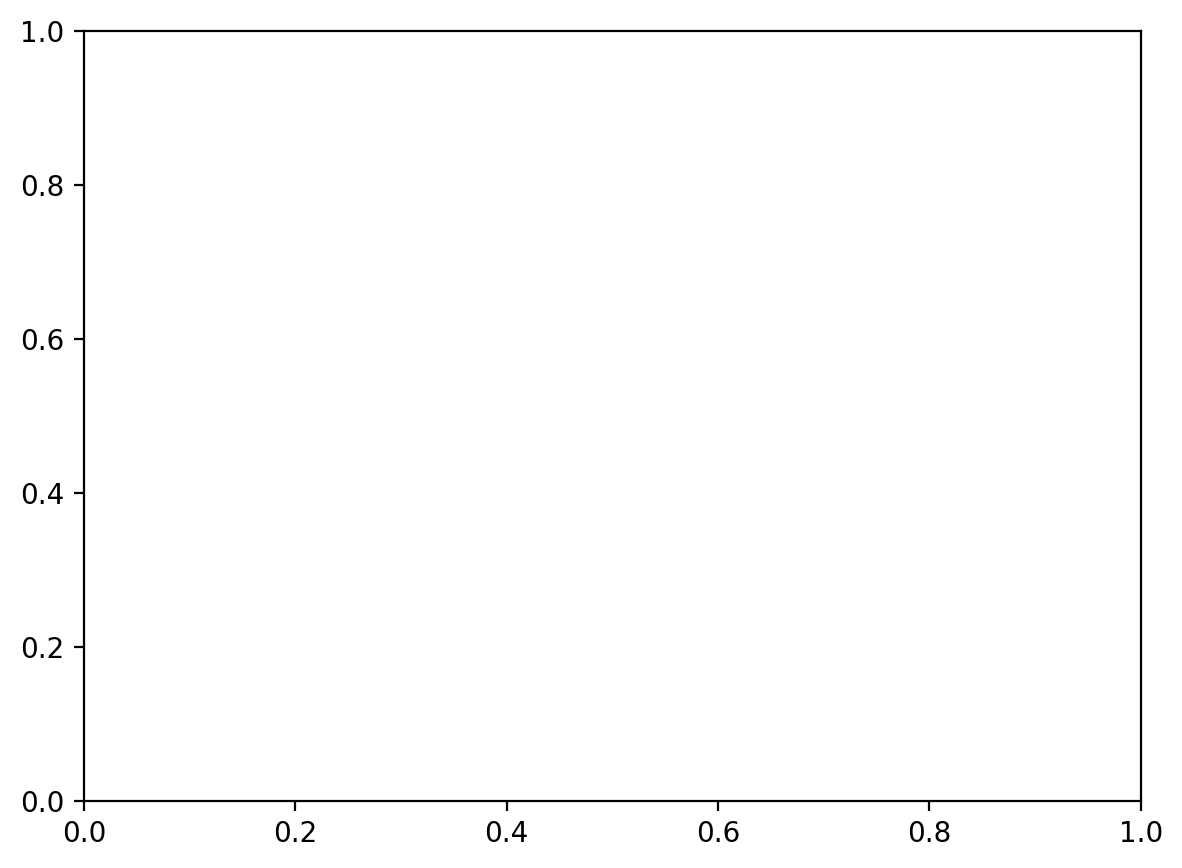

In [ ]:
# trazar la verdad sobre el terreno en el mapa de declaración
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(conf_smf > 5)
for r,c in br_rc:
    plt.plot(c,r,'rx')
plt.title('Ground Truth Locations')
plt.subplot(1,2,2)
plt.imshow(conf_smf > 5)
plt.title('SMF Target Detection')

<h2 id="tema4">4. Breve introducción a la clasificación hiperespectral </h2>
<a name="tema4">


El objetivo de la clasificación hiperespectral es clasificar cada píxel/punto de datos en una de $K$ clases.  En general, los métodos de clasificación son más eficaces que los de desmezcla hiperespectral. Sin embargo, los métodos de clasificación no son eficaces a la hora de determinar las cantidades de proporción subpíxel o la cantidad de un material que puede encontrarse dentro del campo de visión correspondiente a un píxel.  

En general, los enfoques de clasificación hiperespectral implican:
1. (opcionalmente) extracción de características
2. aplicación de un clasificador estándar (es decir, clasificadores de la bibliografía sobre aprendizaje automático).

In [ ]:
# imports and setup
import numpy as np
import os.path
import scipy.io
from loadmat import loadmat

import matplotlib as mpl
default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi*1.5
import matplotlib.pyplot as plt

In [ ]:
# load gulfport campus image (with labels)
img_fname = 'muufl_gulfport_campus_1_hsi_220_label.mat'

dataset = loadmat(img_fname)['hsi']

hsi = dataset['Data']
n_r,n_c,n_b = hsi.shape
wvl = dataset['info']['wavelength']
rgb = dataset['RGB']

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/scipy/io/matlab/_mio.py", line 39, in _open_file
    return open(file_like, mode), True
OSError: [Errno 107] Transport endpoint is not connected: 'muufl_gulfport_campus_1_hsi_220_label.mat'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-82b088f92054>", line 4, in <cell line: 4>
    dataset = loadmat(img_fname)['hsi']
  File "/content/drive/MyDrive/Imagenes-espectrales-session/loadmat.py", line 14, in loadmat
  File "/usr/local/lib/python3.10/dist-packages/scipy/io/matlab/_mio.py", line 225, in loadmat
    with _open_file_context(file_name, appendmat) as f:
  File "/usr/lib/python3.10/contextlib.py", line 135, in __enter__
    return next(self.gen)
  File "/usr/loca

In [ ]:
# trazar la imagen RGB para ver lo que estamos viendo
plt.imshow(rgb)

In [ ]:
# extraer información de etiquetas del conjunto de datos
gt = dataset['sceneLabels']
label_names = gt['Materials_Type']
label_img = gt['labels']

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-388a69c3d7bf>", line 2, in <cell line: 2>
    gt = dataset['sceneLabels']
KeyError: 'sceneLabels'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", 

In [ ]:
# inspeccionar los valores de las etiquetas
print('min label value:',label_img.min())
print('max label value:',label_img.max())
print('label names:',label_names)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-7642ad932ea7>", line 2, in <cell line: 2>
    print('min label value:',label_img.min())
NameError: name 'label_img' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-p

In [ ]:
# mostrar las etiquetas como una imagen
def discrete_matshow(data,minv=None,maxv=None,lbls=None):
    if minv is None:
        minv = np.min(data)
    if maxv is None:
        maxv = np.max(data)
    cmap = plt.get_cmap('RdBu', maxv-minv+1)
    # fijar límites .5 fuera del rango verdadero
    newdata = data.copy().astype(float)
    newdata[data > maxv] = np.nan
    newdata[data < minv] = np.nan
    mat = plt.matshow(newdata,cmap=cmap,vmin = minv-.5, vmax = maxv+.5)
    # indicar a la barra de color que marque los números enteros
    cax = plt.colorbar(mat, ticks=np.arange(minv,maxv+1))

discrete_matshow(label_img,1,10)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-c0f85a938223>", line 16, in <cell line: 16>
    discrete_matshow(label_img,1,10)
NameError: name 'label_img' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-c0f85a938223>", line 16, in <cell line: 16>
    discrete_matshow(label_img,1,10)
NameError: name 'label_img' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/

# **Usando KNN**

In [ ]:
# entrenar un clasificador de vecino más próximo con N muestras de cada una de las 10 clases (1-10)
from sklearn.neighbors import KNeighborsClassifier

# construir el conjunto de entrenamiento
samples = []
labels = []
n_samp_per = 100
for i in range(1,11):
    lbl_inds = (label_img == i).nonzero()
    n_inds = lbl_inds[0].shape[0]
    ns = min(n_inds,n_samp_per)
    perm = np.random.permutation(np.arange(n_inds))
    perm_lbl = (lbl_inds[0][perm],lbl_inds[1][perm])
    pix = hsi[perm_lbl[0][:ns],perm_lbl[1][:ns],:]
    lbls = np.full((ns,1),i,dtype=int)
    samples.append(pix)
    labels.append(lbls)

X = np.vstack(samples)
y = np.vstack(labels).squeeze()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-e7189871186b>", line 2, in <cell line: 2>
    from sklearn.neighbors import KNeighborsClassifier
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.p

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-e7189871186b>", line 2, in <cell line: 2>
    from sklearn.neighbors import KNeighborsClassifier
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.p

In [ ]:
# ajustar el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-f3e8cc493fa2>", line 2, in <cell line: 2>
    knn = KNeighborsClassifier(n_neighbors=5)
NameError: name 'KNeighborsClassifier' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-f3e8cc493fa2>", line 2, in <cell line: 2>
    knn = KNeighborsClassifier(n_neighbors=5)
NameError: name 'KNeighborsClassifier' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-f3e8cc493fa2>", line 2, in <cell line: 2>
    knn = KNeighborsClassifier(n_neighbors=5)
NameError: name 'KNeighborsClassifier' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist

In [ ]:
# predecir resultados
M = np.reshape(hsi,(n_r*n_c,n_b))
Z = knn.predict(M)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-1b66a469aac1>", line 3, in <cell line: 3>
    Z = knn.predict(M)
NameError: name 'knn' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.

In [ ]:
# volver a dar forma a una imagen y distribuir los resultados
z_img = np.reshape(Z,(n_r,n_c))
discrete_matshow(z_img)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-b75cba04aeb1>", line 2, in <cell line: 2>
    z_img = np.reshape(Z,(n_r,n_c))
NameError: name 'Z' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/co

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-b75cba04aeb1>", line 2, in <cell line: 2>
    z_img = np.reshape(Z,(n_r,n_c))
NameError: name 'Z' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/intera

In [ ]:
# volver a mostrar los datos de entrenamiento para compararlos
print(label_names)
discrete_matshow(label_img,1,10)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-5cb6a57ecb80>", line 2, in <cell line: 2>
    print(label_names)
NameError: name 'label_names' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-5cb6a57ecb80>", line 2, in <cell line: 2>
    print(label_names)
NameError: name 'label_names' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interacti

In [ ]:
# evaluar el rendimiento en el conjunto de entrenamiento mediante la matriz de confusión, la puntuación de precisión
from sklearn.metrics import confusion_matrix

lbl_array = np.reshape(label_img,(n_r*n_c))
valid_inds = np.logical_and(lbl_array > 0,lbl_array < 11)

cm = confusion_matrix(lbl_array[valid_inds],Z[valid_inds])
row_sum = cm.sum(axis=1).reshape((cm.shape[0],1)) # suma de filas como vector de columnas
norm_cm = cm/row_sum

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-3283afc7de3e>", line 2, in <cell line: 2>
    from sklearn.metrics import confusion_matrix
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", li

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-3283afc7de3e>", line 2, in <cell line: 2>
    from sklearn.metrics import confusion_matrix
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", li

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-3283afc7de3e>", line 2, in <cell line: 2>
    from sklearn.metrics import confusion_matrix
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", li

In [ ]:
# calcular la precisión global
oa = np.diag(cm).sum()/cm.sum()
print('overall accuracy: %.3f'%oa)
plt.imshow(norm_cm)
plt.colorbar()
plt.title('Per-class confusion')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-6cf6e927f84e>", line 2, in <cell line: 2>
    oa = np.diag(cm).sum()/cm.sum()
NameError: name 'cm' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/c

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-6cf6e927f84e>", line 2, in <cell line: 2>
    oa = np.diag(cm).sum()/cm.sum()
NameError: name 'cm' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/inter

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-6cf6e927f84e>", line 2, in <cell line: 2>
    oa = np.diag(cm).sum()/cm.sum()
NameError: name 'cm' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/inter

# **Usando SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo SVM
svm = SVC(kernel='rbf', C=1, gamma='auto')
svm.fit(X_train_scaled, y_train)

# Predicción y evaluación
y_pred = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-7c03d7f3bf8f>", line 1, in <cell line: 1>
    from sklearn.svm import SVC
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showt

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-7c03d7f3bf8f>", line 1, in <cell line: 1>
    from sklearn.svm import SVC
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showt

In [ ]:
# predecir resultados con SVM
Z_svm = svm.predict(M)

# volver a dar forma a una imagen y distribuir los resultados
z_img_svm = np.reshape(Z_svm, (n_r, n_c))
discrete_matshow(z_img_svm)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-557a1cf5cb78>", line 2, in <cell line: 2>
    Z_svm = svm.predict(M)
NameError: name 'svm' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultr

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-557a1cf5cb78>", line 2, in <cell line: 2>
    Z_svm = svm.predict(M)
NameError: name 'svm' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactivesh

In [ ]:
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(lbl_array[valid_inds], Z_svm[valid_inds])
row_sum_svm = cm_svm.sum(axis=1).reshape((cm_svm.shape[0],1)) # suma de filas como vector de columnas
norm_cm_svm = cm_svm/row_sum_svm

# calcular la precisión global para SVM
oa_svm = np.diag(cm_svm).sum() / cm_svm.sum()
print('Overall accuracy (SVM): %.3f' % oa_svm)

plt.imshow(norm_cm_svm, interpolation='nearest')
plt.colorbar()
plt.title('Per-class confusion matrix (SVM)')
plt.show()


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-f5c074c3c643>", line 1, in <cell line: 1>
    from sklearn.metrics import confusion_matrix
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", li

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-f5c074c3c643>", line 1, in <cell line: 1>
    from sklearn.metrics import confusion_matrix
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", li

# **Usando una red neuronal**

In [ ]:
class HyperSpectralCNN3D(nn.Module):
    def __init__(self, num_classes):
        super(HyperSpectralCNN3D, self).__init__()
        self.conv1 = nn.Conv3d(1, 32, kernel_size=(5, 5, 5), padding=(2, 2, 2))
        self.bn1 = nn.BatchNorm3d(32)
        self.conv2 = nn.Conv3d(32, 64, kernel_size=(5, 5, 5), padding=(2, 2, 2))
        self.bn2 = nn.BatchNorm3d(64)
        self.pool3d = nn.MaxPool3d((2, 2, 2))
        self.dropout = nn.Dropout(0.5)

        # Suponiendo un tamaño de entrada de datos específico puede no ser ideal. Necesitamos calcular el tamaño correcto.
        # Para este ejemplo, ajustaremos esto más tarde basado en el tamaño real de los datos después del pooling.
        self.fc1_size = self._get_conv_output((1, 64, 64, 10))  # Ejemplo de dimensiones de entrada

        self.fc1 = nn.Linear(self.fc1_size, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def _forward_features(self, x):
        x = self.pool3d(F.relu(self.bn1(self.conv1(x))))
        x = self.pool3d(F.relu(self.bn2(self.conv2(x))))
        return x

    def _get_conv_output(self, shape):
        with torch.no_grad():
            input = torch.rand(shape).unsqueeze(0)  # Añade una dimensión batch
            output = self._forward_features(input)
            return int(np.prod(output.size()))

    def forward(self, x):
        x = self._forward_features(x)
        x = x.view(-1, self.fc1_size)  # Usa el tamaño calculado
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-6c8423814615>", line 1, in <cell line: 1>
    class HyperSpectralCNN3D(nn.Module):
NameError: name 'nn' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPyt

In [ ]:

# Inicialización del modelo, optimizador, criterio de pérdida y scheduler utilizando la clase correcta
model = HyperSpectralCNN3D(num_classes=10)  # Asegúrate de utilizar la clase correcta aquí
optimizer = Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=1, gamma=0.95)

model.train()
for epoch in range(10):
    total_loss = 0
    correct = 0
    total = 0
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    scheduler.step()
    epoch_loss = total_loss / len(dataloader)
    epoch_acc = 100 * correct / total
    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-cf11853492ab>", line 2, in <cell line: 2>
    model = HyperSpectralCNN3D(num_classes=10)  # Asegúrate de utilizar la clase correcta aquí
NameError: name 'HyperSpectralCNN3D' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_co

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-cf11853492ab>", line 2, in <cell line: 2>
    model = HyperSpectralCNN3D(num_classes=10)  # Asegúrate de utilizar la clase correcta aquí
NameError: name 'HyperSpectralCNN3D' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, TensorDataset

# Asegúrate de tener un DataLoader para tus datos de prueba.

model.eval()  # Poner el modelo en modo evaluación

# Obtener una muestra del test_loader
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# Hacer predicciones con el modelo
output = model(images)
_, predicted = torch.max(output, 1)

# Convertir la imagen hiperespectral de ejemplo para visualización
# Aquí necesitas elegir cómo deseas visualizar tus datos hiperespectrales. Esto es solo un ejemplo.
# Podrías elegir bandas específicas o calcular un índice para visualizar.
image_np = images.cpu().numpy()[0]  # Convertir a numpy y seleccionar la primera imagen
image_vis = np.mean(image_np, axis=0)  # Ejemplo: promedio sobre el espectro para simplificar

# Mostrar la imagen
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(image_vis, cmap='gray')  # Ajusta según tu tipo de datos
plt.title(f'Original Label: {labels.cpu().numpy()[0]}')

plt.subplot(1, 2, 2)
plt.imshow(image_vis, cmap='gray')  # Ajusta según tu tipo de datos
plt.title(f'Predicted: {predicted.cpu().numpy()[0]}')

plt.show()


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-d1f15bad0b63>", line 3, in <cell line: 3>
    from torch.utils.data import DataLoader, TensorDataset
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshe

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-d1f15bad0b63>", line 3, in <cell line: 3>
    from torch.utils.data import DataLoader, TensorDataset
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshe